<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# ARIMA & SARIMA

_By Jeff Hale: adapted from  Matt Brems, Joseph Nelson, Justin Pounders_

___

### Learning Objectives

After this lesson you will be able to:
- Use ARIMA and its variants to forecast time series values


#### Prior knoweldge required
- Python, pandas, and machine learning basics
- Time series basics
- Understand autoregression 
---

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Stationarity

The criteria for classifying a series as stationary are that the **mean** and **variance** are not a function of time. 

Stationarity in mean and variance: 
![](assets/stationary_mean_var.png)
From [this comprehensive article](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322). 

**A stationary time series has no predictable pattern in the long-term.**



#### How can we test for stationarity? 

One way is by visualizing the data. Is the data below stationary?

![](assets/dow-jones.png)

Stationarity Quiz: 
https://otexts.com/fpp3/stationarity.html

### Testing for stationarity
If this visual check didn't show non-stationarity so clearly, we could use the **Augmented Dickey-Fuller test**: A statistical test of stationarity. 

$$
\begin{eqnarray}
&H_0:& \text{time series is NOT stationary} \\
&H_A:& \text{time series is stationary}
\end{eqnarray}
$$

`adfuller` is the method in the statsmodels library.

---
## Making time series more stationary

To manually make a time series more stationary by removing the trend, you can use **detrending** or **differencing**.

## Example: Detrending

To detrend:
1. Make a line of best fit (Linear Regression)
2. Subtract the values predicted by Linear Regression from the actual values

### Read in drone racing data 

In [2]:
drones = pd.read_csv('data/gt_drone_racing.csv', header=1, )
drones.columns = ['week','drone_racing_interest']
drones.head()

,week,drone_racing_interest
0,2014-11-09,2
1,2014-11-16,2
2,2014-11-23,4
3,2014-11-30,6
4,2014-12-07,7


In [3]:
drones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   week                   108 non-null    object
 1   drone_racing_interest  108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


#### Do the datetime and index conversion and sort 

In [5]:
drones['week'] = pd.to_datetime(drones['week'])

In [6]:
drones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   week                   108 non-null    datetime64[ns]
 1   drone_racing_interest  108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [8]:
drones.set_index('week', inplace = True) #inplace actually changes the dataframe


In [9]:
drones.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2014-11-09 to 2016-11-27
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   drone_racing_interest  108 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


#### Make a best-fit line

In [10]:
#Make the data numeric
X = pd.to_numeric(drones.index)
X = X.to_numpy().reshape(-1, 1)
y = drones['drone_racing_interest']

In [14]:
X[:10] #total seconds from the beginning of time

array([[1415491200000000000],
       [1416096000000000000],
       [1416700800000000000],
       [1417305600000000000],
       [1417910400000000000],
       [1418515200000000000],
       [1419120000000000000],
       [1419724800000000000],
       [1420329600000000000],
       [1420934400000000000]])

In [12]:
y

week
2014-11-09     2
2014-11-16     2
2014-11-23     4
2014-11-30     6
2014-12-07     7
              ..
2016-10-30    33
2016-11-06    43
2016-11-13    52
2016-11-20    60
2016-11-27    46
Name: drone_racing_interest, Length: 108, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [17]:
preds = lr.predict(X)

#### Plot it

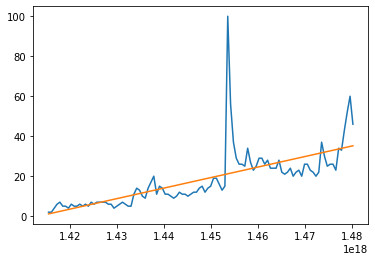

In [18]:
plt.plot(X, y);
plt.plot(X, preds);

In [ ]:
#want to get rid of that trend to make stationary - take upward trend out of it

In [19]:
detrended = y - preds

In [20]:
detrended

week
2014-11-09     0.868502
2014-11-16     0.550087
2014-11-23     2.231673
2014-11-30     3.913258
2014-12-07     4.594844
                ...    
2016-10-30    -0.928177
2016-11-06     8.753408
2016-11-13    17.434994
2016-11-20    25.116579
2016-11-27    10.798165
Name: drone_racing_interest, Length: 108, dtype: float64

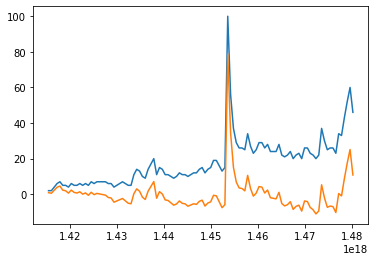

In [21]:
plt.plot(X, y);
plt.plot(X, detrended);

In [ ]:
#no longer has an upward trend to it - addressed mean stationary by subtracting predictions from model

Congrats! You just detrended! 🎉

---
### Differencing

Another method to make time series data more stationarity is **differencing**. 

The differenced series is the change between consecutive observations. So subtract the value at time `t-1` from the value at `t`. 

Earlier you saw how to use the pandas `.diff()` method to find the difference between one time period and the time period before. 

#### Use `diff()` to manually difference the data.

In [28]:
drones.diff().head()

,drone_racing_interest,difference
week,,
2014-11-09,NaN,NaN
2014-11-16,0.0,NaN
2014-11-23,2.0,2.0
2014-11-30,2.0,0.0
2014-12-07,1.0,-1.0


In [29]:
#make an actual column in the data 

drones['difference'] = drones.diff()


ValueError: Columns must be same length as key

#### How does the result of detrending compare to the result of differencing?

2nd order differencing is modeling the change in changes.🤔

"In practice, it is almost never necessary to go beyond second-order differences." - [Hyndman](https://otexts.com/fpp3/stationarity.html)

---
# ARIMA
Now let's do AutoRegression but take into account the trend with ARIMA: Auto-Regressive Integrated Moving Average.🚀

The *Moving Average* here really means fitting the errors - kind of like gradient boosting models fit the errors of earlier models subsequent models. 

An $ARIMA(p, d, q)$ model is specified by
- how many lags $p$ we regress $Y_t^{(d)}$ on.
- how many differences $d$ we need to calculate in order to best achieve stationarity.
- how many errors $q$ we regress $Y_t^{(d)}$ on. 


See the slides for more info: [arima-modeling.pdf](arima-modeling.pdf).

Three hyperparameters when fitting an ARIMA model:
1. Determine a value of $d$ using the Augmented Dickey-Fuller test or KISS test.
2. Determine values of $p$ and $q$ through grid searching.

We'll use the sales data we were using with exponential smoothing models. 

We know there is seasonality here. Let's skip to the next extension: SARIMA.


In [31]:
train = pd.read_csv('data/train.csv')


In [32]:
train.head() #going to try to predict sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [33]:
train.info() #date is an object again 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [37]:
store_1 = train.loc[train['Store'] == 1]
store_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 0 to 10243
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         10244 non-null  int64  
 1   Dept          10244 non-null  int64  
 2   Date          10244 non-null  object 
 3   Weekly_Sales  10244 non-null  float64
 4   IsHoliday     10244 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 410.2+ KB


In [40]:
#make Date a datetime 

store_1['Date'] = pd.to_datetime(store_1['Date'])

store_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10244 entries, 0 to 10243
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         10244 non-null  int64         
 1   Dept          10244 non-null  int64         
 2   Date          10244 non-null  datetime64[ns]
 3   Weekly_Sales  10244 non-null  float64       
 4   IsHoliday     10244 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 410.2 KB


/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_45718/1364932704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1['Date'] = pd.to_datetime(store_1['Date'])


In [41]:
store_1.set_index('Date', inplace = True)

In [42]:
store_1.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [43]:
X = store_1['Weekly_Sales']
X.head()

Date
2010-02-05    24924.50
2010-02-12    46039.49
2010-02-19    41595.55
2010-02-26    19403.54
2010-03-05    21827.90
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Date'>

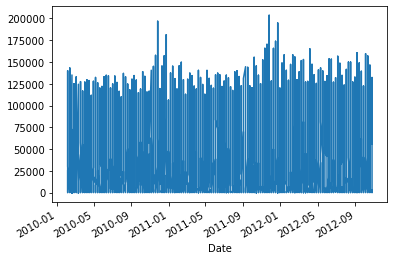

In [44]:
X.plot()

In [ ]:
#does look like there is some regularity in the data 

In [45]:
#limit the data 

X = X.loc['2012':]

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_45718/533555946.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X = X.loc['2012':]


<AxesSubplot:xlabel='Date'>

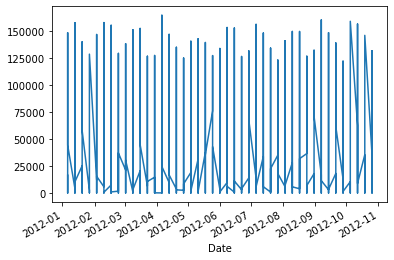

In [46]:
X.plot()

In [49]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
model = ARIMA(X, order = (1, 0 , 1))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

In [56]:
fitmodel = model.fit()

In [57]:
#look at results 

fitmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                 3075
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -31138.058
Date:                Mon, 11 Apr 2022   AIC                          62284.116
Time:                        20:32:11   BIC                          62308.241
Sample:                             0   HQIC                         62292.783
                               - 3075                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.218e+04   7949.596      2.790      0.005    6598.608    3.78e+04
ar.L1          0.9854      0.002    497.167      0.000       0.982       0.989
ma.L1         -0.2047      0.008    -25.665      0.000      -0.220      -0.189
sigma2      3.672e+07    174.865    2.1e+05      0.000    3.67e+07    3.67e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.65   Jarque-Bera (JB):            435092.09
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.44   Skew:                             2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        61.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+19. Standard errors may be unstable.
"""

In [ ]:
#test different values for order 

---
# SARIMA

SARIMA adds seasonality to ARIMA (and you get to choose 4 more parameters). 😀

There are a total of 7 parameters to choose `(p, d, q)` `(P, D, Q)` and `m`. 

- `p` is for the autoregressive component (lags)
- `d` stands for differencing
- `q` is essentially what controls the the moving average window size.

The next three capitalized arguments (`P`, `D`, and `Q`) are for the seasonal components of the equation.

- `m` is for the number of observations per seasonal cylce. 

### For weekly sales data with annual holiday seasonality, `m` would be 52 (for 52 weeks). 

If you had montly data with annual holiday seasonality, what would `m` be?

More in-depth explanation of all the parameters [here](https://alkaline-ml.com/pmdarima/tips_and_tricks.html#understand-p-d-and-q).


## SARIMA with auto-arima 

There are a bunch of ways to find parameter values for SARIMA. You can use autocorrelation plots and partial correlation plots and individual statistical tests to try to figure out parameters. 

Let's use a package that makes GridSearching easier. [pmdarima](https://pypi.org/project/pmdarima/) wraps statsmodels SARIMA under the hood and is designed to have a more sklearn-like API.

#### Using pandas, read in the sales data we saved previously 

In [58]:
pip install pmdarima 

     |████████████████████████████████| 604 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pmdarima as pmd
from pmdarima.utils import tsdisplay

In [61]:
#for p in range(3):
    #for q in range(3):
       # ARIMA(order=(p, 0, q))

TypeError: __init__() missing 1 required positional argument: 'endog'

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


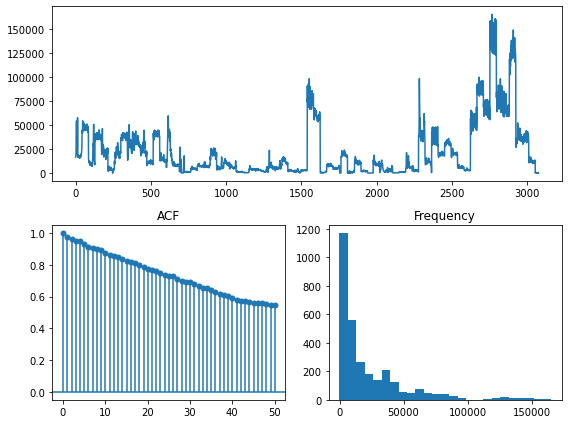

In [62]:
tsdisplay(X)

In [63]:
model = pmd.auto_arima(X, m = 52, trace = True) #trace let's us see results
# m = making assumption there is a pattern every year 
#this took too long in class to load
#lowest AIC = best parameters

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=61880.220, Time=58.75 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=62367.134, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=62260.579, Time=8.42 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=62235.212, Time=12.92 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=62365.136, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[52] intercept   : AIC=61878.003, Time=55.65 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=61876.236, Time=3.25 sec
 ARIMA(2,1,2)(1,0,0)[52] intercept   : AIC=61878.010, Time=48.29 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=62199.761, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=62173.165, Time=1.77 sec
 ARIMA(3,1,2)(0,0,0)[52] intercept   : AIC=61747.246, Time=4.14 sec
 ARIMA(3,1,2)(1,0,0)[52] intercept   : AIC=61748.993, Time=59.39 sec
 ARIMA(3,1,2)(0,0,1)[52] intercept   : AIC=61748.986, Time=69.33 sec
 ARIMA(3,1,2)(1,0,1)[52] intercept   : AIC=61751.219, Time=64.71 se

KeyboardInterrupt: 

In [ ]:
#prints out the AIC score for each of the parameters
#training different ARIMA models with different hyperparameters 
#by default: 4 different combinations - can tell exactly what values to use for p, q, and d


In [64]:
simple_X = X.iloc[-100:]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test = train_test_split(simple_X, shuffle = False)

In [67]:
X_train.tail()

Date
2012-09-07    11544.63
2012-09-14    11646.84
2012-09-21    11034.20
2012-09-28    10857.27
2012-10-05    13434.95
Name: Weekly_Sales, dtype: float64

In [68]:
X_test.head()

Date
2012-10-12    12861.92
2012-10-19    13110.24
2012-10-26    12702.86
2012-02-03      330.00
2012-02-10     1070.00
Name: Weekly_Sales, dtype: float64

In [ ]:
# %pip install pmdarima # uncomment if need to install - may fail with cython issue, if so use colab

In [69]:
model = pmd.auto_arima(X_train, m = 42)

Make some plots.

In [70]:
model.summary()
#chose: 2 prior days for autoregressor (p) 
#q = 2 
#d = 1 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -708.375
Date:                Mon, 11 Apr 2022   AIC                           1426.749
Time:                        21:08:23   BIC                           1438.269
Sample:                             0   HQIC                          1431.345
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2437      0.058      4.214      0.000       0.130       0.357
ar.L2         -0.9457      0.052    -18.231      0.000      -1.047      -0.844
ma.L1         -0.1246      0.090     -1.387      0.165      -0.301       0.051
ma.L2          0.9749      0.145      6.716      0.000       0.690       1.259
sigma2      1.454e+07   1.02e-08   1.43e+15      0.000    1.45e+07    1.45e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):              1828.85
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -3.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.12e+30. Standard errors may be unstable.
"""

In [71]:
#can make predictions with this 

model.predict(len(X_test))

array([13885.5613297 , 13589.74771343, 13091.49153329, 13249.80421756,
       13759.60467017, 13734.1438168 , 13245.80711985, 13150.8583265 ,
       13589.54743524, 13786.2694356 , 13419.33959209, 13143.85885023,
       13423.72744351, 13752.47185678, 13567.92177992, 13212.03764628,
       13299.82758873, 13657.79399743, 13662.02003243, 13324.51244531,
       13238.25129177, 13536.4151333 , 13690.66922825, 13446.28641343,
       13240.83836926])

In [1]:
#plt.plot(X_train.index, X_train) 
#plt.plot(X_test.index, X_test)
plt.plot(model.predict(len(X_test)), label = 'preds') #telling it to predict len(X) timestamps into the future
plt.legend();

NameError: name 'plt' is not defined

Let's instantiate a model. 

`m=52` for the number of observations per seasonal cycle

By default, pmdarima tries 4 common possible models. Then models similar to the best model found are considered. Model performance is determined by the lowest AIC (or BIC).

Or you could specify parameters by hand.

In [ ]:
# model = pmd.auto_arima(
#     train['Weekly_Sales'], 
#     start_p=1, 
#     start_q=1,
#     max_p=2,                 # Hyndman says p almost never > 2
#     max_q=2,
#     d=0,                     # from ndiffs testing
#     start_P=1, 
#     start_Q=1,
#     max_P=2,                
#     max_Q=2,
#     seasonal=True, 
#     m=52,
#     error_action='ignore',   # don't want to know if an order does not work
#     suppress_warnings=True,  # don't want convergence warnings
# )

# # autoarima uses KPSS test instead of ADF for stationarity, by defualt

The Model displays the final parameters. Now we can use the model object to predict the "future" values.

#### Read in the sales predictions we made earlier and add the sarima predictions

#### Plot

#### How did that model perform?

Could try other values for SARIMA. The search wasn't exhaustive.

---
# SARIMAX

SARIMAX extends SARIMA. The X in [SARIMAX](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html) stands for eXogenous variables. Exogenous means "external" (so not *y* nor dependent upon *y*) - think independent features.

SARIMAX allows you to add more predictors, so it's not just the previous values that predict the future values. For example, you can encode another column to be a holiday/no holiday. 🎉

pmdarima wraps SARIMAX. 

#### For example, let's put holidays in as another column
Add a column so that holiday is a 1 and every other day is a 0.

In [75]:
store_1.head(1) #have other features we could use beyond sales data 
#let's use holiday as an additional feature 

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.5,False


In [80]:
store_1['IsHoliday'] = store_1['IsHoliday'].astype('int')

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_45718/794860383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1['IsHoliday'] = store_1['IsHoliday'].astype('int')


In [81]:
#two features: weekly sales and holidy
X = store_1[['IsHoliday', 'Weekly_Sales']].iloc[-100:] #last 100 days for quick model

In [83]:
#only thing required is the y value, but can include an X 
model2 = pmd.auto_arima(y = X['Weekly_Sales'], X = X[['IsHoliday']])

In [84]:
model2.summary()
#holiday is important! 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -900.498
Date:                Mon, 11 Apr 2022   AIC                           1808.995
Time:                        21:22:38   BIC                           1819.375
Sample:                             0   HQIC                          1813.195
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IsHoliday    804.3728    478.956      1.679      0.093    -134.363    1743.109
ma.L1         -0.2191      0.090     -2.434      0.015      -0.396      -0.043
ma.L2         -0.1671      0.086     -1.947      0.052      -0.335       0.001
sigma2      4.969e+06   3.11e+05     16.003      0.000    4.36e+06    5.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               712.20
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -2.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Doh! The data is aggregated by week. This is the kind of stuff that comes up with time series problems.

Let's just add a 1 for the week of Christmas. This is just an illustration. You could add in the marketing spend as another exogenous variable if you had it.

#### Make a model and this time include X

#### Make predictions

The test set only goes through October, so we'll just make the holiday a date in October so you can see what happens to the predictions.

#### Plot

#### Score

The AIC penalizes more features (in this sense, it's like adjusted R2).  

If you have a model that isn't predicting well, you could try to manually make the time series stationary by doing things like Power Transforming it prior to fitting. 

---
## Summary

You've seen how to fit SARIMA and SARIMAX models with `pmd.auto_arima`.

ARIMA models and ETS models (The Exponential Smoothing family including Holt Witners) share some overlap. See [Hyndman](https://otexts.com/fpp3/arima-ets.html) for discussion.

These two model families are quite good for univariate forecasting. SARIMAX lets you add other features to your model.

### Check for understanding

- What do pdq and PDQ stand for?
- How do you add more features to a SARIMA model?